In [1]:
%load_ext google.cloud.bigquery
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


This will select data from BQ into a dataframe

In [2]:
%%bigquery prices
SELECT * FROM sell_prices.sell_prices where store_id = 'CA_1';

In [3]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [4]:
%%bigquery calendar
SELECT * FROM `kaggle-covid.calendar.calendar`;


In [5]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,None,None,None,None,0,0,0
1,2011-02-19,11104,Saturday,1,2,2011,d_22,None,None,None,None,0,0,0
2,2011-02-26,11105,Saturday,1,2,2011,d_29,None,None,None,None,0,0,0
3,2011-03-19,11108,Saturday,1,3,2011,d_50,None,None,None,None,0,0,0
4,2011-03-26,11109,Saturday,1,3,2011,d_57,None,None,None,None,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-03-11,11606,Friday,7,3,2016,d_1869,None,None,None,None,0,1,1
1965,2016-04-08,11610,Friday,7,4,2016,d_1897,None,None,None,None,1,0,1
1966,2016-04-15,11611,Friday,7,4,2016,d_1904,None,None,None,None,0,1,1
1967,2016-05-06,11614,Friday,7,5,2016,d_1925,None,None,None,None,1,1,1


In [6]:
%%bigquery item_013
-- select one item in one store
select 
*
from
sales_train_evaluation.sales_train_evaluation a
where a.store_id = 'CA_1' and a.item_id = 'HOBBIES_1_013';

In [7]:
item_013

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_013_CA_1_evaluation,HOBBIES_1_013,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,0,0,0,0,1,1


In [8]:
%%bigquery store_CA_1
-- select all items from one store
select 
*
from
sales_train_evaluation.sales_train_evaluation a
where a.store_id = 'CA_1';

In [9]:
store_CA_1

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
4,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,FOODS_3_319_CA_1_evaluation,FOODS_3_319,FOODS_3,FOODS,CA_1,CA,5,11,11,15,...,0,0,0,0,0,0,0,0,0,0
3045,FOODS_3_681_CA_1_evaluation,FOODS_3_681,FOODS_3,FOODS,CA_1,CA,12,11,14,6,...,25,25,28,6,15,14,29,29,17,45
3046,FOODS_3_080_CA_1_evaluation,FOODS_3_080,FOODS_3,FOODS,CA_1,CA,33,16,16,14,...,14,19,26,15,15,26,17,15,22,21
3047,FOODS_3_586_CA_1_evaluation,FOODS_3_586,FOODS_3,FOODS,CA_1,CA,42,36,30,23,...,42,45,71,34,46,33,18,33,48,43


Pivot all the date columns into rows to get something more amenable for time series prediction 

In [10]:
df = pd.melt(
    store_CA_1,
    id_vars=[
        'id',
        'item_id',
        'dept_id',
        'cat_id',
        'store_id',
        'state_id'
    ],
    var_name='d',
    value_name='items_sold'
).dropna()

In [11]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d,items_sold
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
5918104,FOODS_3_319_CA_1_evaluation,FOODS_3_319,FOODS_3,FOODS,CA_1,CA,d_1941,0
5918105,FOODS_3_681_CA_1_evaluation,FOODS_3_681,FOODS_3,FOODS,CA_1,CA,d_1941,45
5918106,FOODS_3_080_CA_1_evaluation,FOODS_3_080,FOODS_3,FOODS,CA_1,CA,d_1941,21
5918107,FOODS_3_586_CA_1_evaluation,FOODS_3_586,FOODS_3,FOODS,CA_1,CA,d_1941,43


Join with calendar dataframe

In [12]:
df = pd.merge(df, calendar, on='d', how='left')
df

,id,item_id,dept_id,cat_id,store_id,state_id,d,items_sold,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,None,None,None,None,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,None,None,None,None,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,None,None,None,None,0,0,0
3,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,None,None,None,None,0,0,0
4,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,None,None,None,None,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918104,FOODS_3_319_CA_1_evaluation,FOODS_3_319,FOODS_3,FOODS,CA_1,CA,d_1941,0,2016-05-22,11617,...,2,5,2016,None,None,None,None,0,0,0
5918105,FOODS_3_681_CA_1_evaluation,FOODS_3_681,FOODS_3,FOODS,CA_1,CA,d_1941,45,2016-05-22,11617,...,2,5,2016,None,None,None,None,0,0,0
5918106,FOODS_3_080_CA_1_evaluation,FOODS_3_080,FOODS_3,FOODS,CA_1,CA,d_1941,21,2016-05-22,11617,...,2,5,2016,None,None,None,None,0,0,0
5918107,FOODS_3_586_CA_1_evaluation,FOODS_3_586,FOODS_3,FOODS,CA_1,CA,d_1941,43,2016-05-22,11617,...,2,5,2016,None,None,None,None,0,0,0


Now join with item prices for each item within store for that date (wm_yrwk).

In [13]:
df = pd.merge(
    df,
    prices,
    on=['store_id','item_id','wm_yr_wk'],
    how='left') 

In [14]:
df.describe

<bound method NDFrame.describe of                                     id        item_id    dept_id   cat_id  \
0        HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1        HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2        HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3        HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
4        HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_007  HOBBIES_1  HOBBIES   
...                                ...            ...        ...      ...   
5918104    FOODS_3_319_CA_1_evaluation    FOODS_3_319    FOODS_3    FOODS   
5918105    FOODS_3_681_CA_1_evaluation    FOODS_3_681    FOODS_3    FOODS   
5918106    FOODS_3_080_CA_1_evaluation    FOODS_3_080    FOODS_3    FOODS   
5918107    FOODS_3_586_CA_1_evaluation    FOODS_3_586    FOODS_3    FOODS   
5918108    FOODS_3_587_CA_1_evaluation    FOODS_3_587    FOODS_3    FOODS   

        store_id state_id       d  items_

In [15]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,items_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
3,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
4,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN


In [16]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            5918099, 5918100, 5918101, 5918102, 5918103, 5918104, 5918105,
            5918106, 5918107, 5918108],
           dtype='int64', length=5918109)

In [17]:
df.loc[df['wm_yr_wk'] == 11101]

,id,item_id,dept_id,cat_id,store_id,state_id,d,items_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
3,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
4,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,None,None,None,None,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21338,FOODS_3_319_CA_1_evaluation,FOODS_3_319,FOODS_3,FOODS,CA_1,CA,d_7,13,2011-02-04,11101,...,2,2011,None,None,None,None,1,0,0,1.00
21339,FOODS_3_681_CA_1_evaluation,FOODS_3_681,FOODS_3,FOODS,CA_1,CA,d_7,11,2011-02-04,11101,...,2,2011,None,None,None,None,1,0,0,1.25
21340,FOODS_3_080_CA_1_evaluation,FOODS_3_080,FOODS_3,FOODS,CA_1,CA,d_7,24,2011-02-04,11101,...,2,2011,None,None,None,None,1,0,0,1.48
21341,FOODS_3_586_CA_1_evaluation,FOODS_3_586,FOODS_3,FOODS,CA_1,CA,d_7,30,2011-02-04,11101,...,2,2011,None,None,None,None,1,0,0,1.48


In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [19]:
df_salesby_day = df.groupby(['date'])['items_sold'].sum().dropna().reset_index()
df_salesby_day

,date,items_sold
0,2011-01-29,4337
1,2011-01-30,4155
2,2011-01-31,2816
3,2011-02-01,3051
4,2011-02-02,2630
...,...,...
1936,2016-05-18,3995
1937,2016-05-19,4136
1938,2016-05-20,4433
1939,2016-05-21,5764


In [20]:
df_sales_by_category = df.groupby(['date', 'cat_id'])['items_sold'].sum().dropna().reset_index()

In [21]:
df_sales_by_category.index

RangeIndex(start=0, stop=5823, step=1)

In [22]:
df_sales_by_category.tail()

,date,cat_id,items_sold
5818,2016-05-21,HOBBIES,719
5819,2016-05-21,HOUSEHOLD,1262
5820,2016-05-22,FOODS,4327
5821,2016-05-22,HOBBIES,646
5822,2016-05-22,HOUSEHOLD,1316


In [31]:
df_sales_by_category.loc[df_sales_by_category['date'] >= '2016-01-29', 'date']

5478   2016-01-29
5479   2016-01-29
5480   2016-01-29
5481   2016-01-30
5482   2016-01-30
          ...    
5818   2016-05-21
5819   2016-05-21
5820   2016-05-22
5821   2016-05-22
5822   2016-05-22
Name: date, Length: 345, dtype: datetime64[ns]

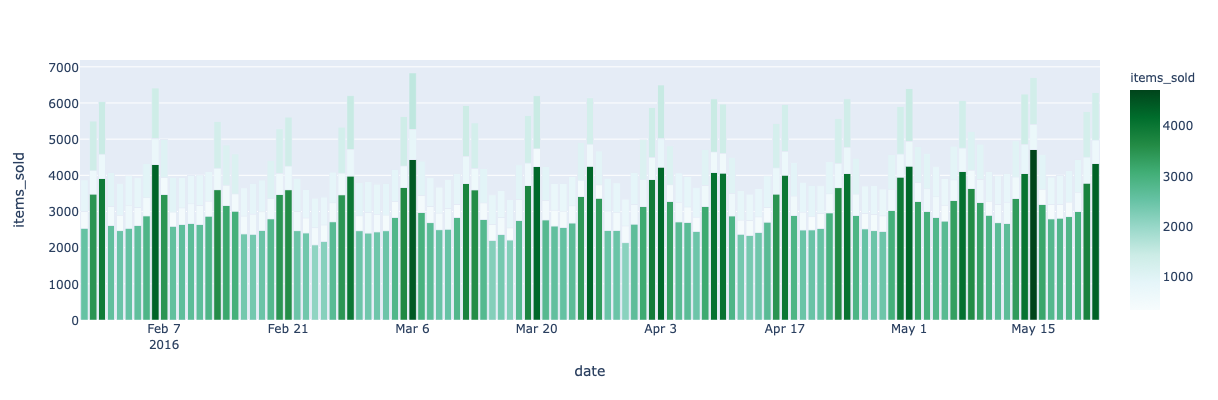

In [32]:
def plot_values(df, from_date=None, target=None):
    fig = px.bar(df.loc[df['date'] >= from_date], x='date', \
             y='items_sold', color="items_sold",\
             width=800, height=400, color_continuous_scale=px.colors.sequential.BuGn)
    fig.show()
    
plot_values(df_sales_by_category, '2016-01-29')

In [37]:
def plot_grouped_valuesx(df):
    fig = go.Figure(data=[
        go.Bar(name='category sales', x=df['date'], y=df['items_sold'], hovertext=df['cat_id'], colorscale=px.colors.sequential.BuGn)
    ])
    # Change the bar mode
    fig.update_layout(
        title='Sales by store',
        yaxis=dict(
            title='items_sold',
            titlefont_size=16,
            tickfont_size=14,
        ))
    fig.show()
    

plot_grouped_valuesx(df_sales_by_category.loc[df_sales_by_category['date'] >= '2016-01-29'])

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'colorscale'

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            base .
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            hovertemplate .
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            offset .
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        r
            r coordinates in scatter traces are deprecated!Please
            switch to the "scatterpolar" trace type.Sets the radial
            coordinatesfor legacy polar chart only.
        rsrc
            Sets the source reference on Chart Studio Cloud for  r
            .
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        t
            t coordinates in scatter traces are deprecated!Please
            switch to the "scatterpolar" trace type.Sets the
            angular coordinatesfor legacy polar chart only.
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            textposition .
        textsrc
            Sets the source reference on Chart Studio Cloud for
            text .
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. Every attributes
            that can be specified per-point (the ones that are
            `arrayOk: true`) are available. variables `value` and
            `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            texttemplate .
        tsrc
            Sets the source reference on Chart Studio Cloud for  t
            .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            width .
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xsrc
            Sets the source reference on Chart Studio Cloud for  x
            .
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        ysrc
            Sets the source reference on Chart Studio Cloud for  y
            .
        